# Using Convolutional Neural Networks to analyze Santa Data

## 1.  First things first: Importing images

In [1]:
# import time
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
import numpy as np

np.random.seed(123)

In [2]:
import seaborn as sns
import sys

In [3]:
import os, shutil
directory = 'data/'

In [4]:
print(len(os.listdir('data/hot_dog')))
print(len(os.listdir('data/not_hot_dog')))

1308
3115


In [5]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# get all the data in the directory split/test (180 images), and reshape them
data_all = ImageDataGenerator(rescale=1./255).flow_from_directory( 
        directory, 
        target_size=(224, 224), 
        batch_size = 10000, 
        seed = 123) 

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 4419 images belonging to 2 classes.


In [6]:
images, labels = next(data_all)

In [7]:
print(np.shape(images))
print(np.shape(labels))

(4419, 224, 224, 3)
(4419, 2)


### 1.1  Looking at the images

In [8]:
np.shape(images[1])

(224, 224, 3)

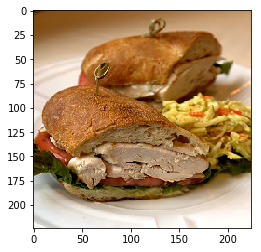

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(images[3])
plt.show()

In [22]:
r_img = images[4][:,:,0]
g_img = images[4][:,:,1]
b_img = images[4][:,:,2]

In [23]:
np.shape(b_img)

(128, 128)

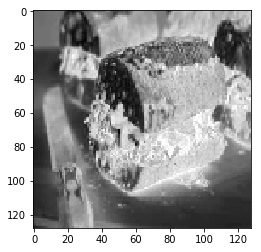

In [114]:
plt.imshow(b_img, plt.cm.binary)
plt.show()

### 1.2 Looking at the labels

The first columns represents "no santa", the second one represents "santa"

In [25]:
labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## 2. Building a densely connected network

### 2.1 reshaping the images

In [161]:
X = images.reshape(images.shape[0], -1)
y = np.reshape(labels[:,0], (4419,1))

In [27]:
np.shape(X)

(4420, 49152)

In [28]:
np.shape(y)

(4420, 1)

In [29]:
len(X[1])

49152

### 2.2 Creating a train, test and validation set

In [162]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

In [163]:
np.shape(X_model)

(3535, 150528)

In [164]:
np.shape(X_test)

(884, 150528)

In [165]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [34]:
np.shape(X_train)

(2828, 49152)

In [35]:
np.shape(y_train)

(2828, 1)

In [36]:
np.shape(y_val)

(708, 1)

In [37]:
from keras import models
from keras import layers
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

dense = models.Sequential()
dense.add(layers.Dense(128, activation='relu', input_shape=(49152,))) #2 hidden layers
dense.add(layers.Dense(64, activation='relu'))
dense.add(layers.Dense(1, activation='sigmoid'))

dense.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

dense_fit = dense.fit(X_train,
                    y_train,
                    epochs=60,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 2828 samples, validate on 708 samples
Epoch 1/60
2828/2828 [==============================] - 8s 3ms/step - loss: 0.6783 - acc: 0.6934 - val_loss: 0.6086 - val_acc: 0.7133
Epoch 2/60
2828/2828 [==============================] - 5s 2ms/step - loss: 0.6143 - acc: 0.7058 - val_loss: 0.6140 - val_acc: 0.7133
Epoch 3/60
2828/2828 [==============================] - 4s 2ms/step - loss: 0.6072 - acc: 0.7054 - val_loss: 0.5935 - val_acc: 0.7133
Epoch 4/60
2828/2828 [==============================] - 4s 1ms/step - loss: 0.6017 - acc: 0.7054 - val_loss: 0.6004 - val_acc: 0.7133
Epoch 5/60
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5960 - acc: 0.7040 - val_loss: 0.6147 - val_acc: 0.7133
Epoch 6/60
2828/2828 [==============================] - 4s 2ms/step - loss: 0.5909 - acc: 0.7058 - val_loss: 0.5907 - val_acc: 0.7133
Epoch 7/60
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5953 - acc: 0.7054 - val_loss: 0.6091 - val_acc: 0.7203
Epoch 8/60
2828

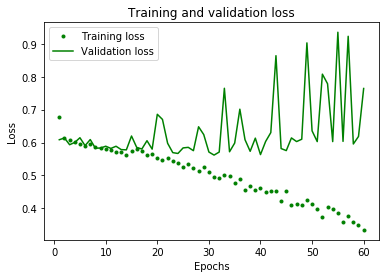

In [38]:
hist_dense = dense_fit.history
loss_values = hist_dense['loss']
val_loss_values = hist_dense['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

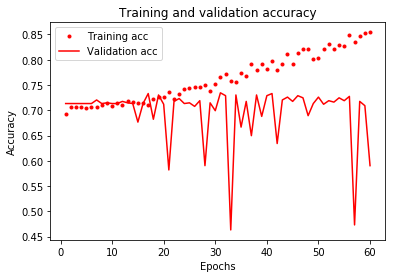

In [39]:
acc_values = hist_dense['acc'] 
val_acc_values = hist_dense['val_acc']

plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [63]:
from keras import models
from keras import layers
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

dense = models.Sequential()
dense.add(layers.Dense(128, activation='relu', input_shape=(49152,))) #2 hidden layers
dense.add(layers.Dense(64, activation='relu'))
dense.add(layers.Dense(1, activation='sigmoid'))

dense.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

dense_fit = dense.fit(X_train,
                    y_train,
                    epochs=150,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 2828 samples, validate on 708 samples
Epoch 1/150
2828/2828 [==============================] - 5s 2ms/step - loss: 0.6765 - acc: 0.6934 - val_loss: 0.6112 - val_acc: 0.7133
Epoch 2/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.6128 - acc: 0.7058 - val_loss: 0.6275 - val_acc: 0.7133
Epoch 3/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.6055 - acc: 0.7058 - val_loss: 0.5931 - val_acc: 0.7133
Epoch 4/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.6001 - acc: 0.7058 - val_loss: 0.6067 - val_acc: 0.7133
Epoch 5/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5966 - acc: 0.7051 - val_loss: 0.6148 - val_acc: 0.7133
Epoch 6/150
2828/2828 [==============================] - 4s 2ms/step - loss: 0.5887 - acc: 0.7040 - val_loss: 0.5863 - val_acc: 0.7133
Epoch 7/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.5926 - acc: 0.7072 - val_loss: 0.5941 - val_acc: 0.7175
Epoch 8/

Epoch 61/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.3399 - acc: 0.8610 - val_loss: 0.6634 - val_acc: 0.7203
Epoch 62/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.3170 - acc: 0.8685 - val_loss: 0.6835 - val_acc: 0.7232
Epoch 63/150
2828/2828 [==============================] - 4s 2ms/step - loss: 0.3592 - acc: 0.8472 - val_loss: 0.6119 - val_acc: 0.7218
Epoch 64/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.2983 - acc: 0.8819 - val_loss: 0.7592 - val_acc: 0.6045
Epoch 65/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.2805 - acc: 0.8840 - val_loss: 0.6749 - val_acc: 0.7232
Epoch 66/150
2828/2828 [==============================] - 4s 2ms/step - loss: 0.2855 - acc: 0.8872 - val_loss: 0.6896 - val_acc: 0.7302
Epoch 67/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.2608 - acc: 0.8936 - val_loss: 0.6918 - val_acc: 0.6709
Epoch 68/150
2828/2828 [========================

2828/2828 [==============================] - 4s 2ms/step - loss: 0.0544 - acc: 0.9915 - val_loss: 0.9437 - val_acc: 0.6794
Epoch 122/150
2828/2828 [==============================] - 4s 2ms/step - loss: 0.1236 - acc: 0.9590 - val_loss: 0.9650 - val_acc: 0.7119
Epoch 123/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.0631 - acc: 0.9816 - val_loss: 0.9871 - val_acc: 0.6653
Epoch 124/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.1430 - acc: 0.9714 - val_loss: 0.7669 - val_acc: 0.6638
Epoch 125/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.2991 - acc: 0.8773 - val_loss: 0.8848 - val_acc: 0.6992
Epoch 126/150
2828/2828 [==============================] - 4s 1ms/step - loss: 0.0976 - acc: 0.9724 - val_loss: 1.2768 - val_acc: 0.5523
Epoch 127/150
2828/2828 [==============================] - 4s 2ms/step - loss: 0.1502 - acc: 0.9540 - val_loss: 0.9168 - val_acc: 0.6695
Epoch 128/150
2828/2828 [==============================

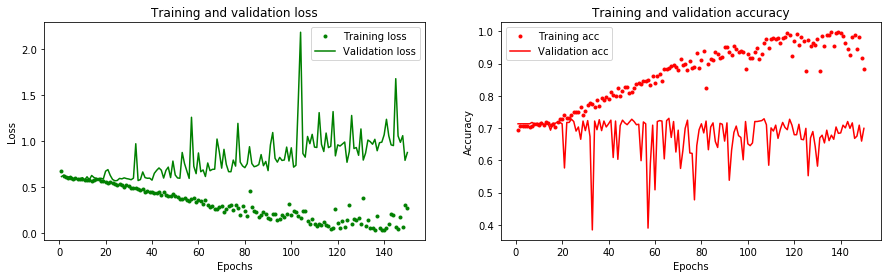

In [64]:
hist_dense = dense_fit.history
loss_values = hist_dense['loss']
val_loss_values = hist_dense['val_loss']
acc_values = hist_dense['acc'] 
val_acc_values = hist_dense['val_acc']

epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=(15,4))
plt.subplot(121)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(122)
plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [65]:
results_train = dense.evaluate(X_train, y_train)

2828/2828 [==============================] - 2s 699us/step


In [66]:
results_test = dense.evaluate(X_test, y_test)

884/884 [==============================] - 2s 2ms/step


In [67]:
results_train

[0.20667676899524187, 0.9105374822353541]

In [68]:
results_test

[0.9044838841684264, 0.6742081442569715]

## 3. Convolutional neural network

In [141]:
from sklearn.model_selection import train_test_split
X_model, X_test, y_model, y_test = train_test_split(images, y, test_size=0.20, random_state=123)

In [142]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_model, y_model, test_size=0.20, random_state=123)

In [85]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128,  3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [86]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 61, 61, 32)        18464     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 28800)             0         
_________________________________________________________________
dense_24 (Dense)             (None, 32)                921632    
_________________________________________________________________
dense_25 (Dense)             (None, 1)                 33        
Total para

In [120]:
# filter is 3*3*3, 64 or them and bias term for each filter
3*3*3*64+64

1792

In [121]:
# filter for second one
32*3*3*64+32

18464

In [87]:
history = model.fit(X_train,
                    y_train,
                    epochs=60,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 2828 samples, validate on 708 samples
Epoch 1/60
2828/2828 [==============================] - 234s 83ms/step - loss: 0.6078 - acc: 0.7005 - val_loss: 0.5966 - val_acc: 0.7133
Epoch 2/60
2828/2828 [==============================] - 157s 56ms/step - loss: 0.5959 - acc: 0.7058 - val_loss: 0.5847 - val_acc: 0.7133
Epoch 3/60
2828/2828 [==============================] - 144s 51ms/step - loss: 0.5910 - acc: 0.7058 - val_loss: 0.5844 - val_acc: 0.7133
Epoch 4/60
2828/2828 [==============================] - 148s 52ms/step - loss: 0.5842 - acc: 0.7058 - val_loss: 0.5937 - val_acc: 0.7133
Epoch 5/60
2828/2828 [==============================] - 131s 46ms/step - loss: 0.5804 - acc: 0.7058 - val_loss: 0.5753 - val_acc: 0.7133
Epoch 6/60
2828/2828 [==============================] - 151s 53ms/step - loss: 0.5767 - acc: 0.7076 - val_loss: 0.5700 - val_acc: 0.7133
Epoch 7/60
2828/2828 [==============================] - 178s 63ms/step - loss: 0.5705 - acc: 0.7047 - val_loss: 0.5740 - val_acc: 0

2828/2828 [==============================] - 132s 47ms/step - loss: 0.1751 - acc: 0.9455 - val_loss: 0.8208 - val_acc: 0.6328


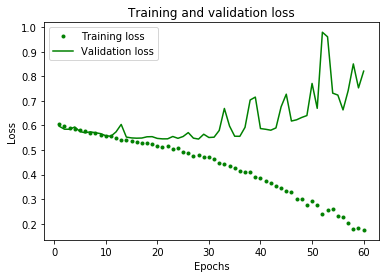

In [116]:
hist_cnn = history.history
loss_values = hist_cnn['loss']
val_loss_values = hist_cnn['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

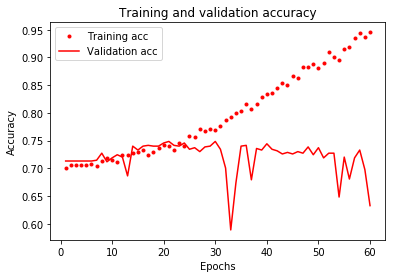

In [117]:
acc_values = hist_cnn['acc'] 
val_acc_values = hist_cnn['val_acc']

plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [118]:
results_train = model.evaluate(X_train, y_train)

2828/2828 [==============================] - 86s 31ms/step


In [119]:
results_test = model.evaluate(X_test, y_test)

884/884 [==============================] - 32s 36ms/step


In [120]:
results_train

[0.21252603138648132, 0.9278642149929278]

In [121]:
results_test

[0.9037382972186507, 0.5984162893230559]

## 4. Drop-out regularization

In [101]:
from numpy.random import seed
seed(123)
from tensorflow import set_random_seed
set_random_seed(123)

dropout = models.Sequential()
dropout.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(128, 128,  3)))
dropout.add(layers.MaxPooling2D((2, 2)))
dropout.add(layers.Conv2D(32, (3, 3), activation='relu'))
dropout.add(layers.MaxPooling2D((2, 2)))

dropout.add(layers.Flatten())
dropout.add(layers.Dropout(0.5))
dropout.add(layers.Dense(32, activation='relu'))
dropout.add(layers.Dense(1, activation='sigmoid'))

dropout.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])
drop_model = dropout.fit(X_train,
                    y_train,
                    epochs=15,
                    batch_size=50,
                    validation_data=(X_val, y_val))

Train on 2828 samples, validate on 708 samples
Epoch 1/15
2828/2828 [==============================] - 359s 127ms/step - loss: 0.6153 - acc: 0.6963 - val_loss: 0.5967 - val_acc: 0.7133
Epoch 2/15
2828/2828 [==============================] - 228s 81ms/step - loss: 0.6043 - acc: 0.7058 - val_loss: 0.5899 - val_acc: 0.7133
Epoch 3/15
2828/2828 [==============================] - 217s 77ms/step - loss: 0.6003 - acc: 0.7058 - val_loss: 0.5871 - val_acc: 0.7133
Epoch 4/15
2828/2828 [==============================] - 241s 85ms/step - loss: 0.5906 - acc: 0.7058 - val_loss: 0.5886 - val_acc: 0.7133
Epoch 5/15
2828/2828 [==============================] - 247s 87ms/step - loss: 0.5902 - acc: 0.7058 - val_loss: 0.5811 - val_acc: 0.7133
Epoch 6/15
2828/2828 [==============================] - 240s 85ms/step - loss: 0.5840 - acc: 0.7058 - val_loss: 0.5751 - val_acc: 0.7133
Epoch 7/15
2828/2828 [==============================] - 220s 78ms/step - loss: 0.5786 - acc: 0.7058 - val_loss: 0.6053 - val_acc: 

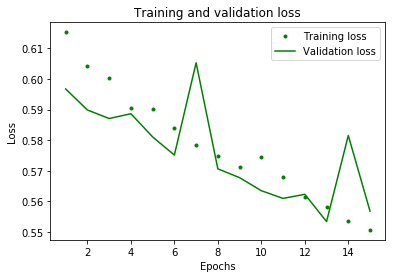

In [102]:
hist_cnn_drop = drop_model.history
loss_values = hist_cnn_drop['loss']
val_loss_values = hist_cnn_drop['val_loss']

epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'g.', label='Training loss')
plt.plot(epochs, val_loss_values, 'g', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

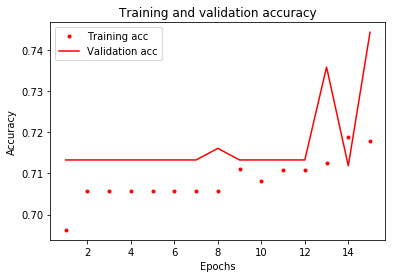

In [103]:
acc_values = hist_cnn_drop['acc'] 
val_acc_values = hist_cnn_drop['val_acc']

plt.plot(epochs, acc_values, 'r.', label='Training acc')
plt.plot(epochs, val_acc_values, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [115]:
dropout.save('dropout_reg_conv')

In [104]:
results_train = dropout.evaluate(X_train, y_train)

2828/2828 [==============================] - 68s 24ms/step


In [105]:
results_test = dropout.evaluate(X_test, y_test)

884/884 [==============================] - 22s 24ms/step


In [106]:
results_train

[0.543533607200315, 0.7323196605374823]

In [107]:
results_test

[0.5645314945894129, 0.7217194567438704]

## 5. Pre-Trained Models


In [323]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet
 
#Load the VGG model
vgg_model = vgg16.VGG16(weights='imagenet', include_top=False)
 
# #Load the Inception_V3 model
# inception_model = inception_v3.InceptionV3(weights='imagenet')
 
# #Load the ResNet50 model
# resnet_model = resnet50.ResNet50(weights='imagenet')
 
# #Load the MobileNet model
# mobilenet_model = mobilenet.MobileNet(weights='imagenet')

In [302]:
from keras.applications.vgg16 import decode_predictions

In [332]:
train_features = np.zeros(shape=(4419, 7, 7, 512))

In [303]:
# hotdog = vgg16.preprocess_input(images[1111])

In [318]:
hotdog = np.expand_dims(images[112], axis=0)

In [305]:
hotdog.shape

(1, 224, 224, 3)

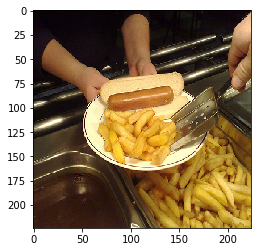

In [319]:
plt.imshow(images[112])

In [320]:
predict = resnet_model.predict(hotdog)

In [321]:
predict.shape

(1, 1000)

In [322]:
label = decode_predictions(predict, top=3)[0]
print (label)

[('n01930112', 'nematode', 0.09883579), ('n03729826', 'matchstick', 0.026745036), ('n03041632', 'cleaver', 0.026375193)]


In [ ]:
i = 0
for inputs_batch, labels_batch in data_all:
    features_batch = vgg_model.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nImages:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))